In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Estaremos guardando los datos en un txt para optimizar procesos y guardar memoria. Por ello se importan los grados de la red en un archivo txt.

In [3]:
ruta = "C:/Users/pepe2/Documents/QuackRepository/Quack/Ciencia_de_Redes/socfb-Penn94.mtx"
G = nx.from_pandas_edgelist(pd.read_csv(ruta,
                    # nrows = 10,
                    sep = " ",
                    header = None,
                    skiprows = 2,
                    # usecols=[0,1]
                    ),source = 0, target = 1)

grado_dict = dict(nx.degree(G))

Degree = np.array([grado_dict[i] for i in G])

np.savetxt('degree.txt',Degree)


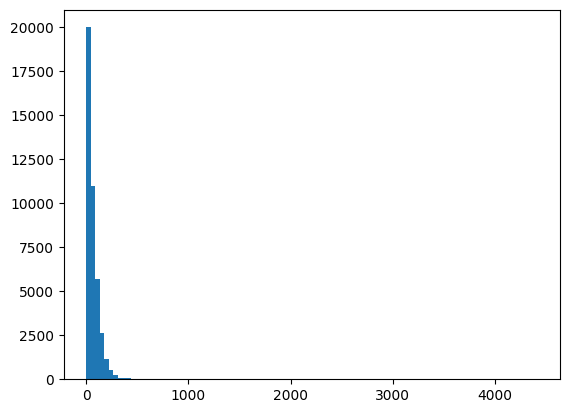

In [4]:
Degree = np.loadtxt('degree.txt')

plt.hist(Degree, bins = 100)
plt.show()

# Visualización

El tamaño de nuestra x0 es 4412 y el de y0 es 4411


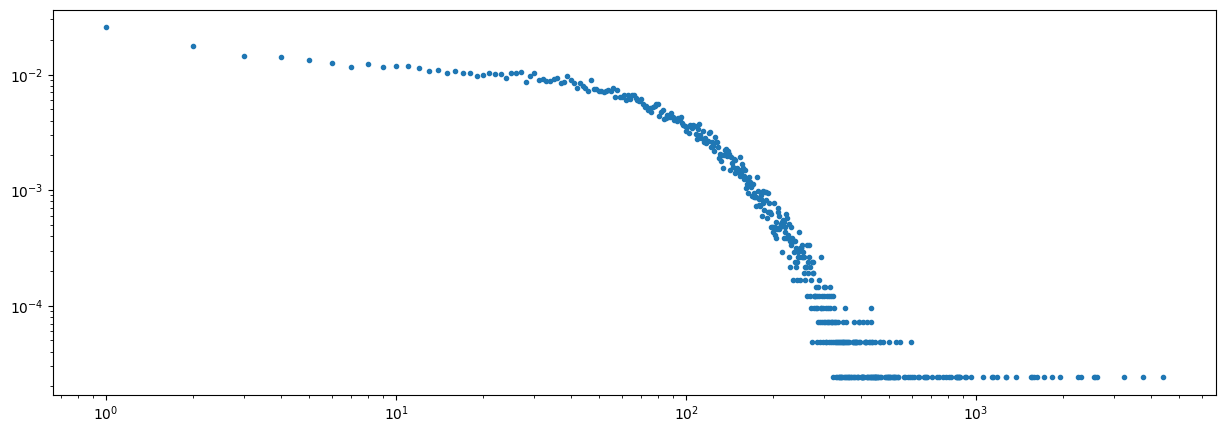

In [5]:
K = Degree.max()
y0,x0 = np.histogram(Degree,
                     bins = range(int(K)+2),
                     density = True)

# Comprobamos cuál es el tamaño de lo que vamos a graficar, posteriormente será muy útil
print("El tamaño de nuestra x0 es {} y el de y0 es {}".format(len(x0),len(y0)))
#

plt.figure(figsize = [15,5])
plt.plot(x0[:-1],y0,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

Como estamos hablando de temas probabilísticos. Daremos a los bins valores regulares.

No tomar un valor específico de grado sino un intervalo. Después obtnemos la probabilidad de que un nodo esté en ese intervalo.

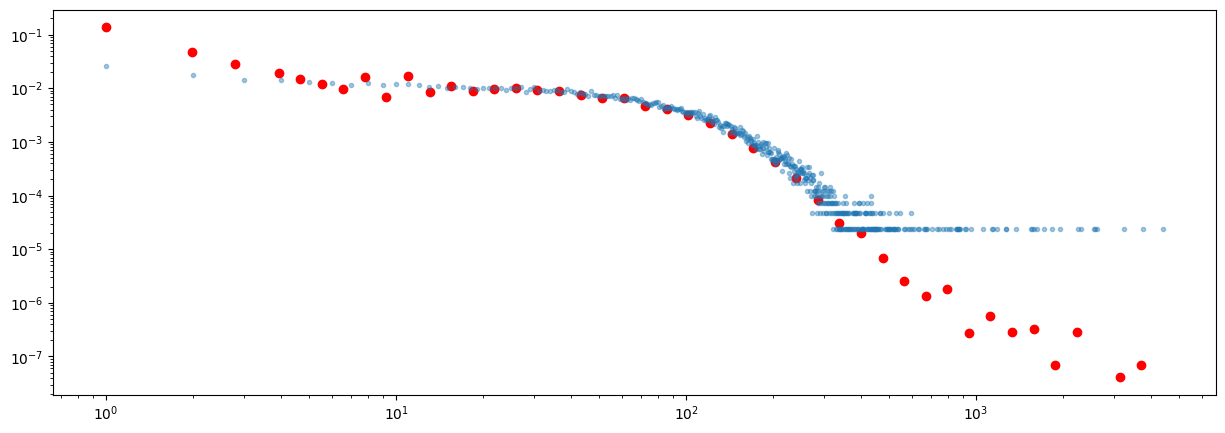

In [6]:
log_bins = np.logspace(0,np.log10(K+2))

y,x = np.histogram(Degree,
                   bins = log_bins,
                   density = True,)
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x0[:-1],y0,'.',alpha = 0.4)
plt.xscale('log')
plt.yscale('log')
plt.show()


# CCDF

El objetivo es eliminar el ruido de nuestros grados más grandes. Inspeccionamos si cumple o no cumple una ley de potencia.

In [7]:
ccdf = np.array([y0[i:].sum() for i in range(len(y0))])


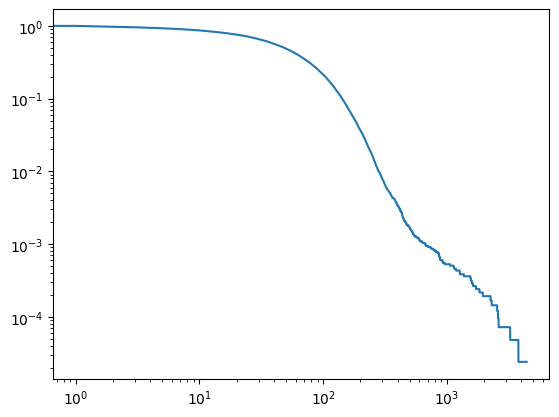

In [8]:
plt.plot(x0[:-1],ccdf)
plt.xscale('log')
plt.yscale('log')
plt.show()

Lo que sigue es calcular la potencia

# Estimación de potencia

In [10]:
k_min = 1

D = Degree[Degree >= k_min]

Degree

array([169., 108.,  21., ...,   1.,   1.,   1.])

In [11]:
alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)

In [12]:
alpha

1.2756259074672507

¿Cómo saber si alpha es un valor correcto que satisface a nuestros datos?

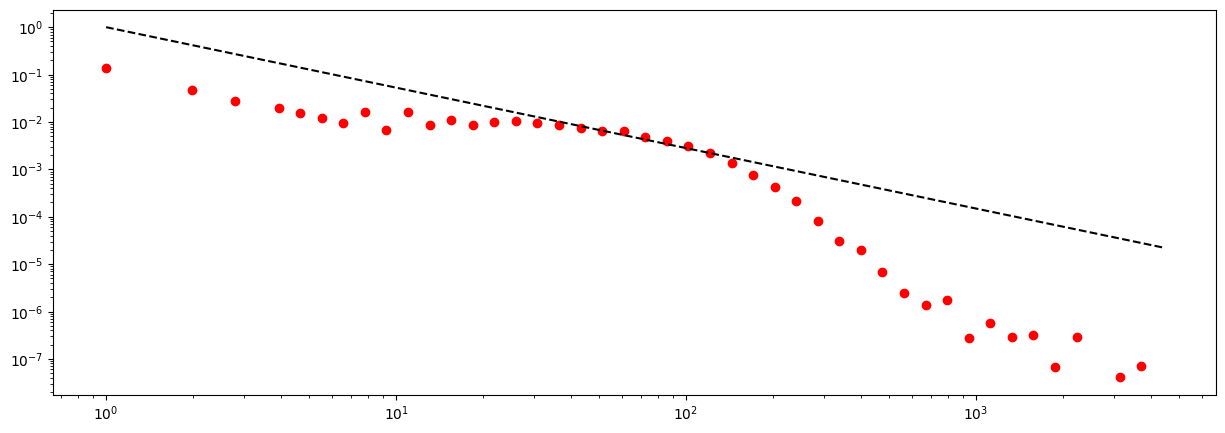

In [13]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x,x**(-alpha),'k--')
plt.xscale('log')
plt.yscale('log')
plt.show()

Si variamos el k_min se puede apreciar que el ajuste se aproxima mejor

In [14]:
def likelihood(k_min):
    D = Degree[Degree >= k_min]
    alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)
    plt.figure(figsize = [15,5])
    plt.plot(x[:-1],y,'ro')
    plt.plot(x,x**(-alpha),'k--')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

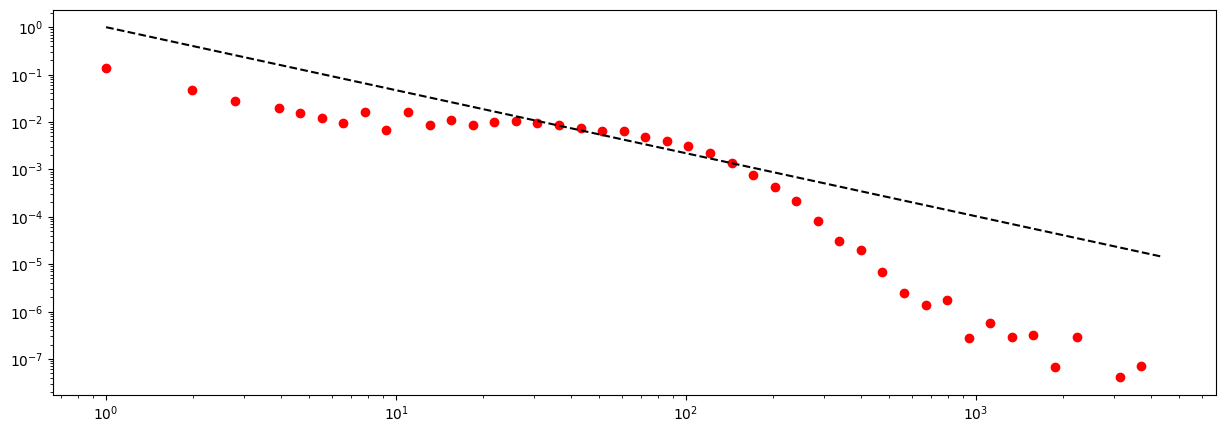

In [15]:
likelihood(2)

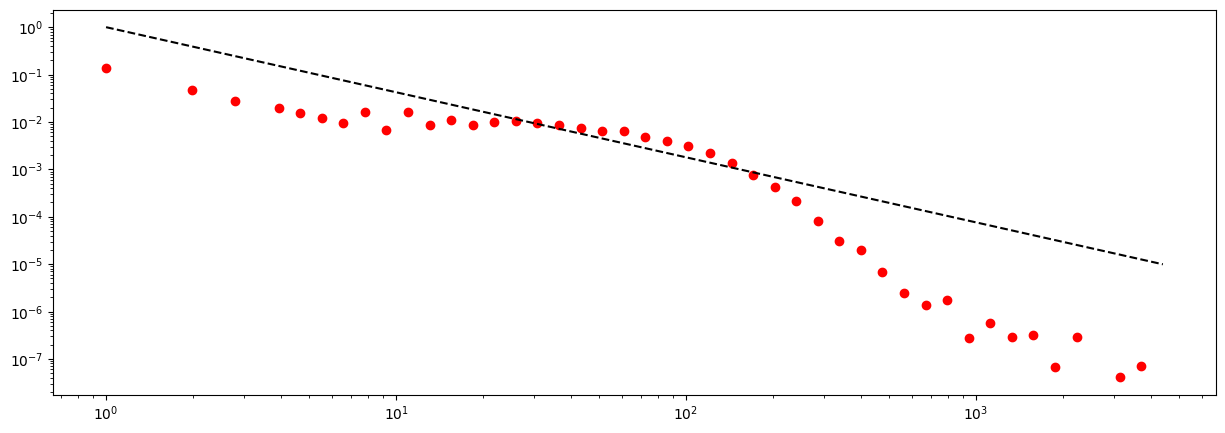

In [16]:
likelihood(3)

Y así sucesivamente

# Powerlow

Comportamiento respecto a x_min

In [17]:
dominio = np.logspace(0,np.log10(K+2))
alphas = []
for k_min in dominio:
    D = Degree[Degree >= k_min]
    alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)
    alphas.append(alpha)

alphas

C:\Users\pepe2\AppData\Local\Temp\ipykernel_17856\2244183417.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)
C:\Users\pepe2\AppData\Local\Temp\ipykernel_17856\2244183417.py:5: RuntimeWarning: invalid value encountered in double_scalars
  alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)


[1.2756259074672507,
 1.281484846138306,
 1.295742306924775,
 1.3115211326552603,
 1.3290785570827681,
 1.3420095026896348,
 1.363289144011141,
 1.381287947840761,
 1.4079263746941062,
 1.4314746932168945,
 1.458925975358285,
 1.4909601663038956,
 1.5286618495663027,
 1.5648871988311104,
 1.6163207482426665,
 1.6599415951890495,
 1.7238784042274051,
 1.7919296855976683,
 1.8777009582732669,
 1.9718434735629256,
 2.074652633705278,
 2.1954858785207545,
 2.3344035057615766,
 2.507177205832722,
 2.7198048880743624,
 2.923347627358484,
 3.2134574542084167,
 3.5226564471904256,
 3.8336764126434963,
 4.075996259151075,
 4.245450724866343,
 4.384904149685088,
 4.294526327071534,
 3.775607797310704,
 3.36322193702435,
 3.223982464954551,
 2.7250847626443813,
 2.5377259802688226,
 2.5826494428282496,
 2.741212902954047,
 2.5694128284222755,
 2.9215369583163304,
 3.0356648129794483,
 3.4559327850783332,
 3.5809048418598195,
 4.847577971503599,
 3.7860408947027673,
 6.328636503589054,
 11.7133743

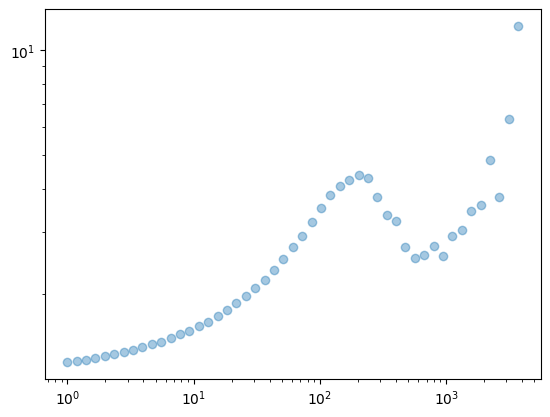

In [18]:
plt.plot(dominio,alphas,'o',alpha = 0.4)
plt.xscale('log')
plt.yscale('log')
plt.show()  

In [20]:
import powerlaw

In [21]:
fit = powerlaw.Fit(Degree)

Calculating best minimal value for power law fit


In [22]:
fit.alpha

4.253701976826193

In [23]:
fit.xmin

165.0

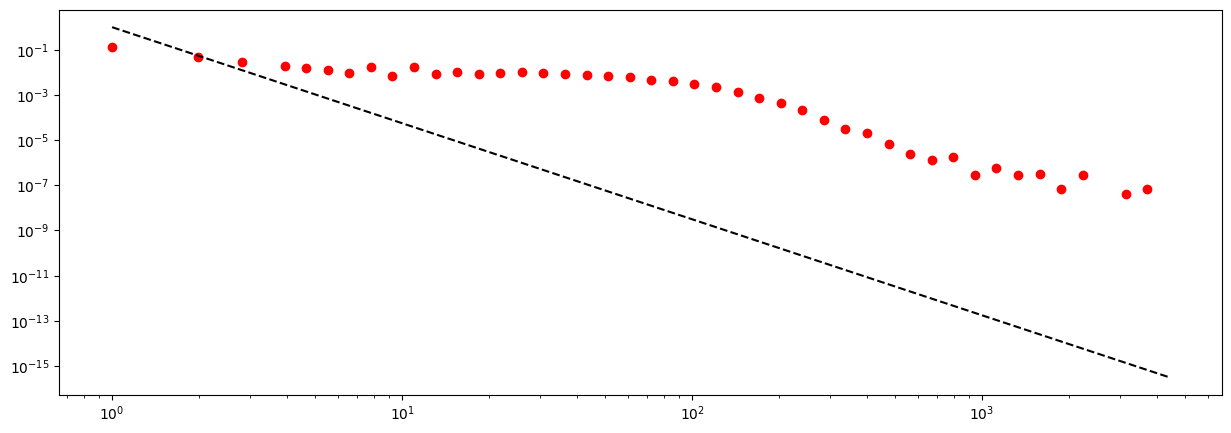

In [28]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x,x**(-fit.alpha),'k--')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [29]:
fit.alpha

4.253701976826193

Muchos fenómenos complejos se encuentran entre las potencias 1 y 3

Las alphas ajustadas entonces para aquellas redes que se parecen a una ley de potencia tendrían algo interesante entre 1 y 3